In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import linear_sum_assignment

In [2]:
data = pd.read_csv('Mortality.csv', index_col = 'Gene ID')
data

,Hs name,Dm name,Death inlarvae (%),Death in pupae (%),Abnormal adults (%),Normal adults (%)
Gene ID,,,,,,
TC009722,PRMT1,art1,0.131579,0.105263,0.131579,0.631579
TC008078,PRMT3,art3,0.131579,0.157895,0.026316,0.684211
TC004581,PRMT4,art4,0.250000,0.093750,0.093750,0.562500
TC002133,PRMT7,art7,0.081081,0.027027,0.000000,0.891892
TC034762,PRMT8,art8,0.146341,0.000000,0.000000,0.853659
TC001103,SUV39H,Su(var)3-9,0.066667,0.066667,0.133333,0.733333
TC011127,EHMT,G9a,0.066667,0.000000,0.066667,0.866667
TC031269,SETDB,eggless,0.000000,0.937500,0.062500,0.000000
TC004768,KMT2,trx,0.000000,0.142857,0.500000,0.357143


In [3]:
raw = pd.read_csv("../../Table1/SankeyData_KMT.csv", sep = ",")
raw = pd.DataFrame(raw.sort_values(by = ["Human Symbol","Score"], ascending=False).to_numpy(), 
                   index=raw.index, columns=raw.columns)
raw["Left"] = raw["Score"]/raw.groupby("Human Symbol")["Score"].transform('sum')
leftorders = pd.Series(raw['Human Symbol'].unique()).unique()
rightorders = pd.Series(raw['T. castaneum Gene'].unique()).unique()
Score_matrix = np.zeros((len(leftorders),len(rightorders)))
for i,left in enumerate(leftorders):
    sub_data = raw[raw['Human Symbol'] == left]
    for j,right in enumerate(rightorders):
        try:
            score = sub_data[sub_data['T. castaneum Gene'] == right].Score.tolist()[0]
            Score_matrix[(i,j)] = score
        except:
            None
row_indices, col_indices = linear_sum_assignment(-Score_matrix)
new_rightorders = [rightorders[i] for i in col_indices]

heatmap_gene = []
for i in rightorders:
    if i in data.index:
        heatmap_gene.append(i)

data_todraw = data.loc[heatmap_gene].iloc[:,2:]*100
data_todraw = data_todraw.iloc[::-1]


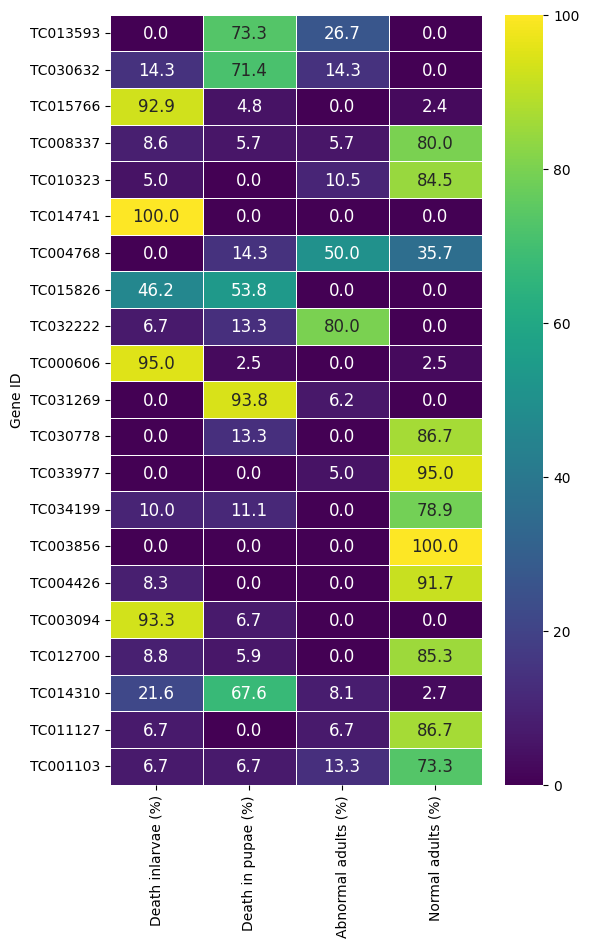

In [4]:
fig, ax = plt.subplots(figsize = (6,10))
# Create a heatmap with annotations
sns.heatmap(data_todraw, annot=True,  cmap="viridis", fmt=".1f", linewidths= 0.5, annot_kws={"fontsize": 12},ax=ax, vmin = 0, vmax = 100)
# Display the heatmap
plt.show()
fig.savefig('KMT_heatmap_112924.pdf', bbox_inches='tight', dpi = 300)

/var/folders/l2/kwxvbnds5n5bq9tl0g4kr8zc0000gn/T/ipykernel_22642/3488302054.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (3,0.6))


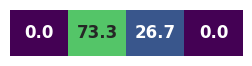

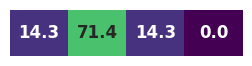

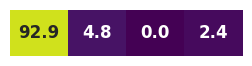

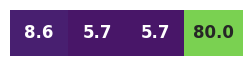

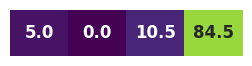

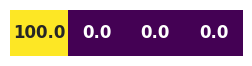

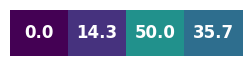

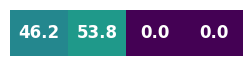

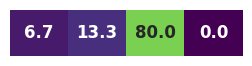

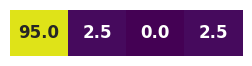

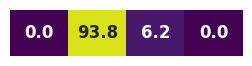

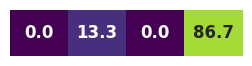

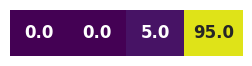

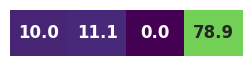

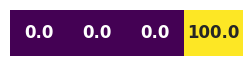

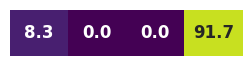

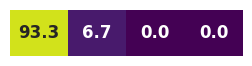

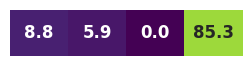

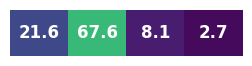

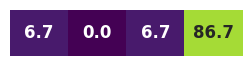

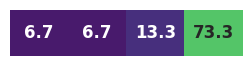

In [5]:
for i in data_todraw.index:
    fig, ax = plt.subplots(figsize = (3,0.6))
    subset = np.empty((1, 4))
    subset[0] = data_todraw.loc[i].to_numpy()
    sns.heatmap(subset, annot=True,  cmap="viridis", fmt=".1f",  annot_kws={"fontsize": 12,"fontweight": "bold"},ax=ax, vmin = 0, vmax = 100, cbar=False)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([])
    plt.yticks([])
    plt.gca().patch.set_facecolor('none')
    plt.gca().patch.set_edgecolor('none')
    plt.gcf().patch.set_facecolor('none')

    fig.savefig('figures/' + i + '.png', bbox_inches='tight', dpi = 300)

In [6]:
raw = pd.read_csv("../../Table1/SankeyData_PRMT.csv", sep = ",")
raw = pd.DataFrame(raw.sort_values(by = ["Human Symbol","Score"], ascending=False).to_numpy(), 
                   index=raw.index, columns=raw.columns)
raw["Left"] = raw["Score"]/raw.groupby("Human Symbol")["Score"].transform('sum')
leftorders = pd.Series(raw['Human Symbol'].unique()).unique()
rightorders = pd.Series(raw['T. castaneum Gene'].unique()).unique()
Score_matrix = np.zeros((len(leftorders),len(rightorders)))
for i,left in enumerate(leftorders):
    sub_data = raw[raw['Human Symbol'] == left]
    for j,right in enumerate(rightorders):
        try:
            score = sub_data[sub_data['T. castaneum Gene'] == right].Score.tolist()[0]
            Score_matrix[(i,j)] = score
        except:
            None
row_indices, col_indices = linear_sum_assignment(-Score_matrix)
new_rightorders = [rightorders[i] for i in col_indices]

heatmap_gene = []
for i in rightorders:
    if i in data.index:
        heatmap_gene.append(i)

data_todraw = data.loc[heatmap_gene].iloc[:,2:]*100
data_todraw = data_todraw.iloc[::-1]


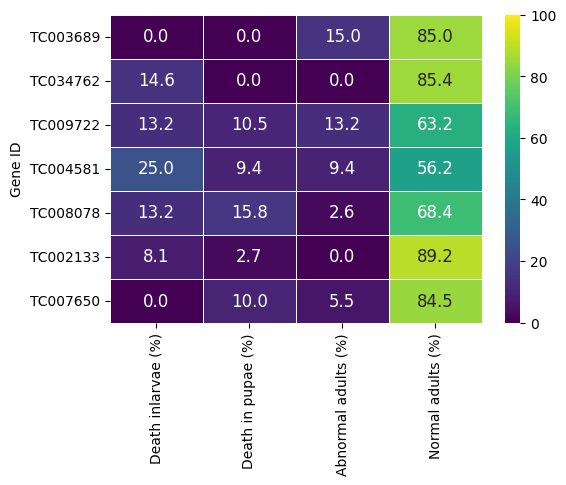

In [7]:
fig, ax = plt.subplots(figsize = (6,4))
# Create a heatmap with annotations
sns.heatmap(data_todraw, annot=True,  cmap="viridis", fmt=".1f", linewidths= 0.5, annot_kws={"fontsize": 12},ax=ax, vmin = 0, vmax = 100)
# Display the heatmap
plt.show()
fig.savefig('PRMT_heatmap_112924.pdf', bbox_inches='tight', dpi = 300)

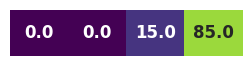

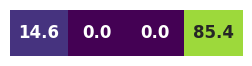

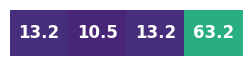

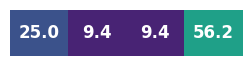

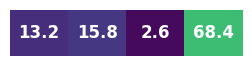

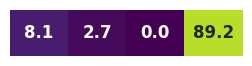

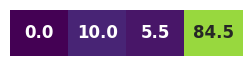

In [8]:
for i in data_todraw.index:
    fig, ax = plt.subplots(figsize = (3,0.6))
    subset = np.empty((1, 4))
    subset[0] = data_todraw.loc[i].to_numpy()
    sns.heatmap(subset, annot=True,  cmap="viridis", fmt=".1f",  annot_kws={"fontsize": 12,"fontweight": "bold"},ax=ax, vmin = 0, vmax = 100, cbar=False)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([])
    plt.yticks([])
    plt.gca().patch.set_facecolor('none')
    plt.gca().patch.set_edgecolor('none')
    plt.gcf().patch.set_facecolor('none')

    fig.savefig('figures/' + i + '.png', bbox_inches='tight', dpi = 300)

In [9]:
raw = pd.read_csv("../../Table1/SankeyData_KDM.csv", sep = ",")
raw = pd.DataFrame(raw.sort_values(by = ["Human Symbol","Score"], ascending=False).to_numpy(), 
                   index=raw.index, columns=raw.columns)
raw["Left"] = raw["Score"]/raw.groupby("Human Symbol")["Score"].transform('sum')
leftorders = pd.Series(raw['Human Symbol'].unique()).unique()
rightorders = pd.Series(raw['T. castaneum Gene'].unique()).unique()
Score_matrix = np.zeros((len(leftorders),len(rightorders)))
for i,left in enumerate(leftorders):
    sub_data = raw[raw['Human Symbol'] == left]
    for j,right in enumerate(rightorders):
        try:
            score = sub_data[sub_data['T. castaneum Gene'] == right].Score.tolist()[0]
            Score_matrix[(i,j)] = score
        except:
            None
row_indices, col_indices = linear_sum_assignment(-Score_matrix)
new_rightorders = [rightorders[i] for i in col_indices]

heatmap_gene = []
for i in rightorders:
    if i in data.index:
        heatmap_gene.append(i)

data_todraw = data.loc[heatmap_gene].iloc[:,2:]*100
data_todraw = data_todraw.iloc[::-1]

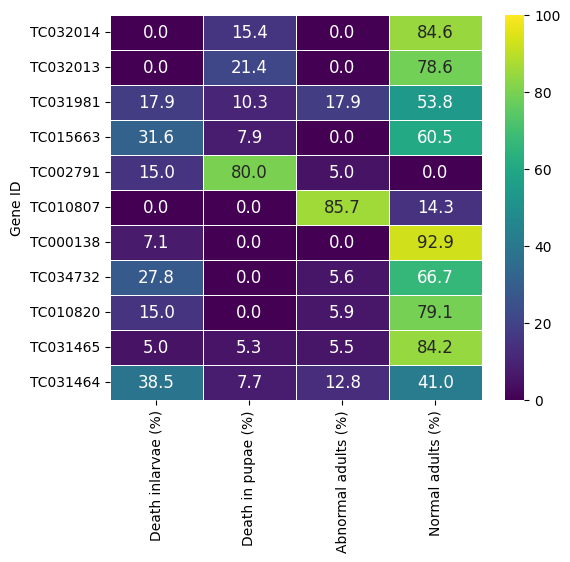

In [10]:
fig, ax = plt.subplots(figsize = (6,5))
# Create a heatmap with annotations
sns.heatmap(data_todraw, annot=True,  cmap="viridis", fmt=".1f", linewidths= 0.5, annot_kws={"fontsize": 12},ax=ax, vmin = 0, vmax = 100)
# Display the heatmap
plt.show()
fig.savefig('KDM_heatmap_112924.pdf', bbox_inches='tight', dpi = 300)

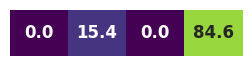

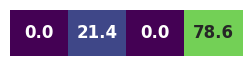

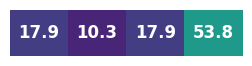

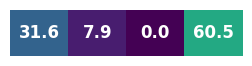

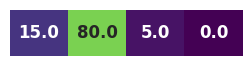

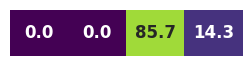

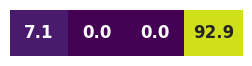

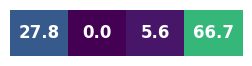

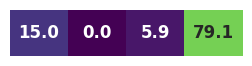

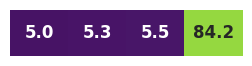

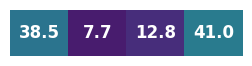

In [11]:
for i in data_todraw.index:
    fig, ax = plt.subplots(figsize = (3,0.6))
    subset = np.empty((1, 4))
    subset[0] = data_todraw.loc[i].to_numpy()
    sns.heatmap(subset, annot=True,  cmap="viridis", fmt=".1f",  annot_kws={"fontsize": 12,"fontweight": "bold"},ax=ax, vmin = 0, vmax = 100, cbar=False)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([])
    plt.yticks([])
    plt.gca().patch.set_facecolor('none')
    plt.gca().patch.set_edgecolor('none')
    plt.gcf().patch.set_facecolor('none')

    fig.savefig('figures/' + i + '.png', bbox_inches='tight', dpi = 300)